In this benchmark, we compare throughput (MB/s) while reading a single ROOT file from different (geographical) locations, using different number of local workers.

### Purdue EOS, FUSE mounted

In [1]:
import os, sys
sys.path.append(os.getcwd()+"/../af_benchmark")
from benchmark import Benchmark, run_benchmark
import numpy as np
import tqdm
import time
from dask_gateway import Gateway
%env XRD_REQUESTTIMEOUT 300

nworkers_options = [2,4,8,16]
col_num_options = [30,120,240,300]
# nworkers_options = [8]
# col_num_options = [1200]

b = Benchmark("config_3.2.yaml")
for nworkers in nworkers_options:
    for col_num in tqdm.tqdm(col_num_options):
        b.config["executor"]["n_workers"] = int(nworkers)
        b.config["processor"]["columns"] = int(col_num)
        b.reset(keep_cluster=True, reset_workers=True)
        b.run()
        b.update_report()

report = b.report_df

env: XRD_REQUESTTIMEOUT=300


2024-03-08 09:40:37,712 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-bx7fmlbh', purging
2024-03-08 09:40:37,713 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 09:40:37,713 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 09:40:37,713 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 09:40:37,713 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 09:40:37,713 - distributed.utils - INFO - Reload module tmpsdtrr4wj from .py file
2024-03-08 09:40:37,713 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 09:

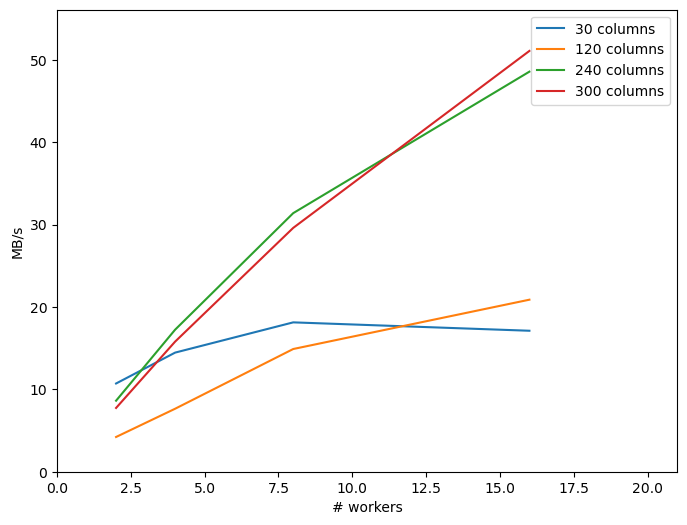

In [2]:
import matplotlib.pyplot as plt

report["MB/s (compressed)"] = report.compressed_bytes/report.process_columns/(1024*1024)

report_by_ncols = report.groupby('n_columns_read')

plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group["MB/s (compressed)"], label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('MB/s')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report['MB/s (compressed)'].max() + 5)
plt.show()

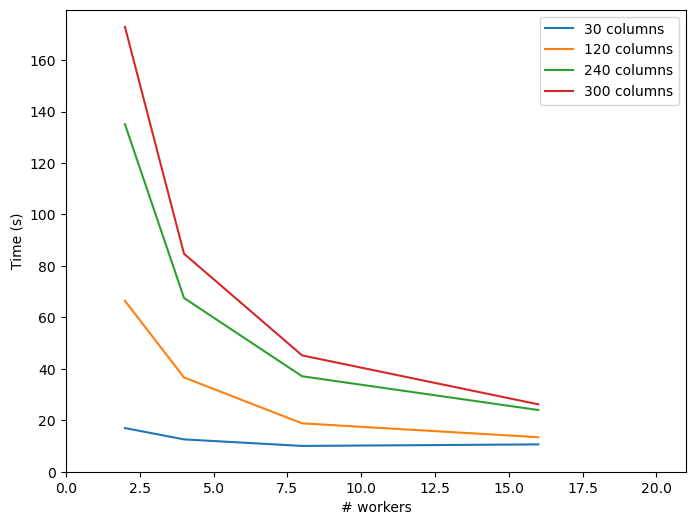

In [3]:
plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group.process_columns, label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('Time (s)')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report.run.max() + 5)
plt.show()

### Purdue EOS, via XRootD

In [4]:
import os, sys
sys.path.append(os.getcwd()+"/../af_benchmark")
from benchmark import Benchmark, run_benchmark
import numpy as np
import tqdm
import time
from dask_gateway import Gateway
%env XRD_REQUESTTIMEOUT 300

nworkers_options = [2,4,8,16]
col_num_options = [30,120,240,300]
# nworkers_options = [8]
# col_num_options = [1200]

b = Benchmark("config_3.2.yaml")
file = b.config["data-access"]["files"][0]
file = file.replace("/eos/purdue", "root://eos.cms.rcac.purdue.edu:1094/")
b.config["data-access"]["files"] = [file]
for nworkers in nworkers_options:
    for col_num in tqdm.tqdm(col_num_options):
        b.config["executor"]["n_workers"] = int(nworkers)
        b.config["processor"]["columns"] = int(col_num)
        b.reset(keep_cluster=True, reset_workers=True)
        b.run()
        b.update_report()

report = b.report_df

env: XRD_REQUESTTIMEOUT=300


/depot/cms/kernels/python3/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46491 instead
  warnings.warn(
2024-03-08 09:54:03,065 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 09:54:03,065 - distributed.utils - INFO - Reload module tmp4uv7e0ka from .py file
2024-03-08 09:54:03,066 - distributed.preloading - INFO - Import preload module: /tmp/tmp4uv7e0ka.py
2024-03-08 09:54:03,067 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 09:54:03,068 - distributed.utils - INFO - Reload module tmp1derwqnm from .py file
2024-03-08 09:54:03,068 - distributed.preloading - INFO - Import preload module: /tmp/tmp1derwqnm.py
2024-03-08 09:54:03,072 - distributed.preloading - INFO - Creating preload: import

2024-03-08 10:28:00,502 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


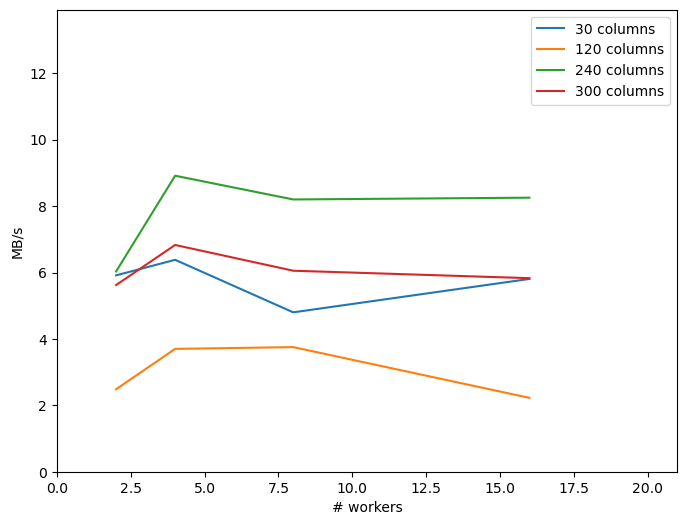

In [5]:
import matplotlib.pyplot as plt

report["MB/s (compressed)"] = report.compressed_bytes/report.process_columns/(1024*1024)

report_by_ncols = report.groupby('n_columns_read')

plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group["MB/s (compressed)"], label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('MB/s')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report['MB/s (compressed)'].max() + 5)
plt.show()

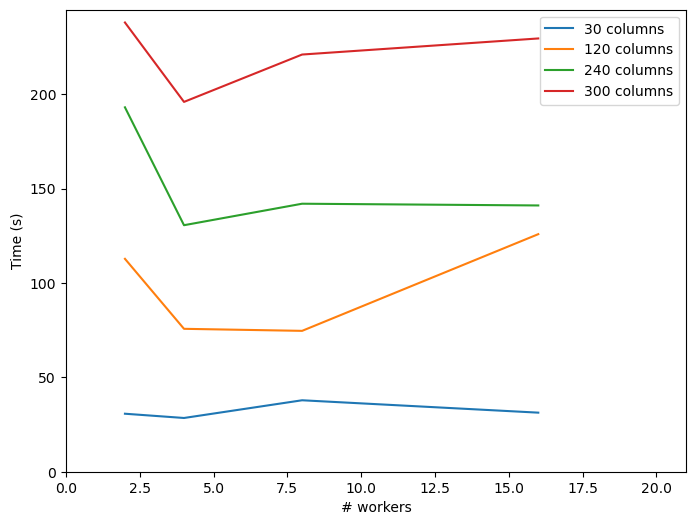

In [6]:
plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group.process_columns, label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('Time (s)')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report.run.max() + 5)
plt.show()

### Purdue XCache

In [7]:
import os, sys
sys.path.append(os.getcwd()+"/../af_benchmark")
from benchmark import Benchmark, run_benchmark
import numpy as np
import tqdm
import time
from dask_gateway import Gateway
%env XRD_REQUESTTIMEOUT 300

nworkers_options = [2,4,8,16]
col_num_options = [30,120,240,300]
# nworkers_options = [8]
# col_num_options = [1200]

b = Benchmark("config_3.2.yaml")
file = b.config["data-access"]["files"][0]
file = file.replace("/eos/purdue", "root://cms-xcache.rcac.purdue.edu:1094/")
b.config["data-access"]["files"] = [file]
for nworkers in nworkers_options:
    for col_num in tqdm.tqdm(col_num_options):
        b.config["executor"]["n_workers"] = int(nworkers)
        b.config["processor"]["columns"] = int(col_num)
        b.reset(keep_cluster=True, reset_workers=True)
        b.run()
        b.update_report()

report = b.report_df

env: XRD_REQUESTTIMEOUT=300


2024-03-08 10:28:01,943 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 10:28:01,943 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 10:28:01,944 - distributed.utils - INFO - Reload module tmpa0cw81qg from .py file
2024-03-08 10:28:01,944 - distributed.utils - INFO - Reload module tmpfe_3cjgp from .py file
2024-03-08 10:28:01,944 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 10:28:01,944 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 10:28:01,944 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 10:28:01,944 - distributed.preloading - INFO - Creati

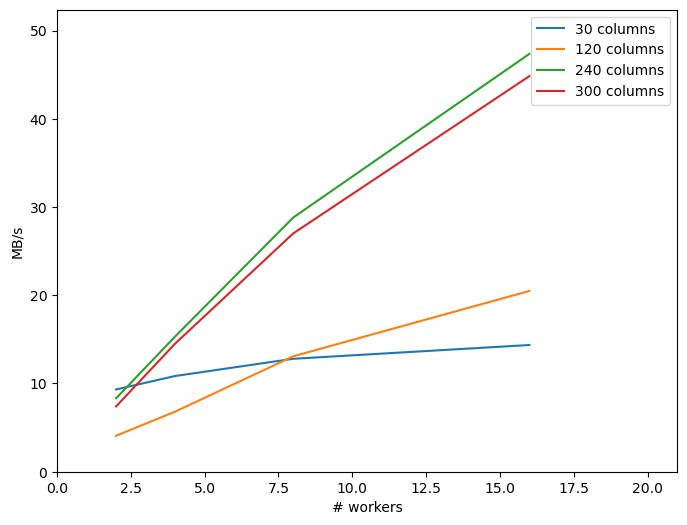

In [8]:
import matplotlib.pyplot as plt

report["MB/s (compressed)"] = report.compressed_bytes/report.process_columns/(1024*1024)

report_by_ncols = report.groupby('n_columns_read')

plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group["MB/s (compressed)"], label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('MB/s')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report['MB/s (compressed)'].max() + 5)
plt.show()

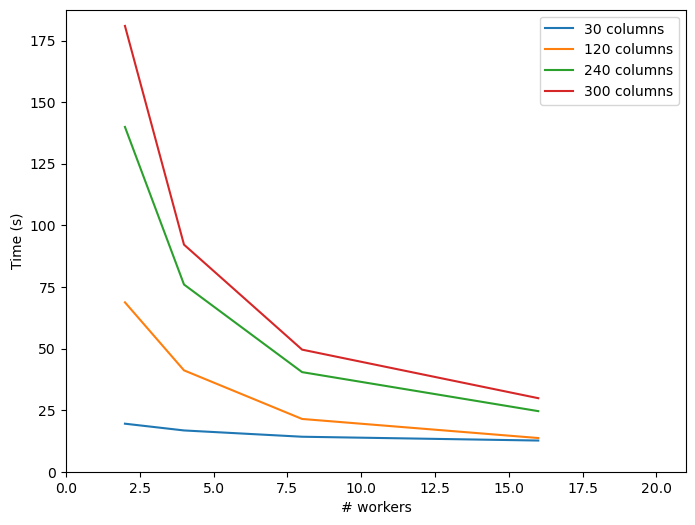

In [9]:
plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group.process_columns, label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('Time (s)')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report.run.max() + 5)
plt.show()

### T2_US_Wisconsin

In [10]:
import os, sys
sys.path.append(os.getcwd()+"/../af_benchmark")
from benchmark import Benchmark, run_benchmark
import numpy as np
import tqdm
import time
from dask_gateway import Gateway
%env XRD_REQUESTTIMEOUT 300

nworkers_options = [2,4,8,16]
col_num_options = [30,120,240,300]
# nworkers_options = [8]
# col_num_options = [1200]

b = Benchmark("config_3.2.yaml")
file = b.config["data-access"]["files"][0]
file = file.replace("/eos/purdue", "root://cmsxrootd.hep.wisc.edu:1094/")
b.config["data-access"]["files"] = [file]
for nworkers in nworkers_options:
    for col_num in tqdm.tqdm(col_num_options):
        b.config["executor"]["n_workers"] = int(nworkers)
        b.config["processor"]["columns"] = int(col_num)
        b.reset(keep_cluster=True, reset_workers=True)
        b.run()
        b.update_report()

report = b.report_df

env: XRD_REQUESTTIMEOUT=300


/depot/cms/kernels/python3/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37919 instead
  warnings.warn(
2024-03-08 10:42:35,095 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 10:42:35,095 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 10:42:35,096 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 10:42:35,096 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 10:42:35,096 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 10:42:35,

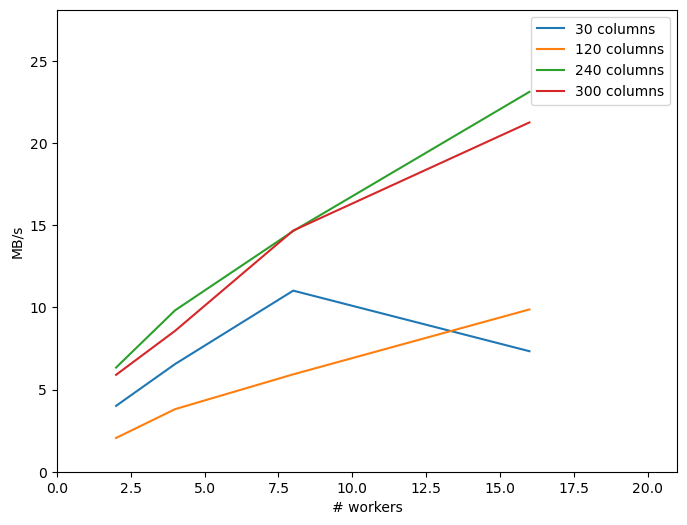

In [11]:
import matplotlib.pyplot as plt

report["MB/s (compressed)"] = report.compressed_bytes/report.process_columns/(1024*1024)

report_by_ncols = report.groupby('n_columns_read')

plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group["MB/s (compressed)"], label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('MB/s')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report['MB/s (compressed)'].max() + 5)
plt.show()

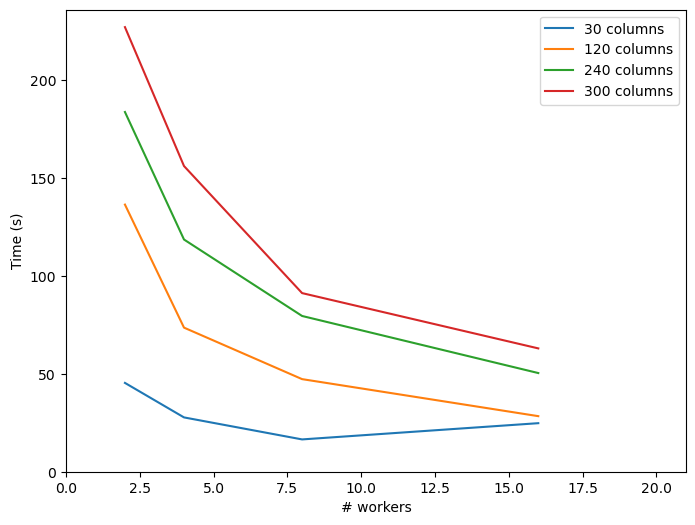

In [12]:
plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group.process_columns, label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('Time (s)')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report.run.max() + 5)
plt.show()

### T2_US_Caltech

In [13]:
import os, sys
sys.path.append(os.getcwd()+"/../af_benchmark")
from benchmark import Benchmark, run_benchmark
import numpy as np
import tqdm
import time
from dask_gateway import Gateway
%env XRD_REQUESTTIMEOUT 300

nworkers_options = [2,4,8,16]
col_num_options = [30,120,240,300]
# nworkers_options = [8]
# col_num_options = [1200]

b = Benchmark("config_3.2.yaml")
file = b.config["data-access"]["files"][0]
file = file.replace("/eos/purdue", "root://k8s-redir.ultralight.org:1094/")
b.config["data-access"]["files"] = [file]
for nworkers in nworkers_options:
    for col_num in tqdm.tqdm(col_num_options):
        b.config["executor"]["n_workers"] = int(nworkers)
        b.config["processor"]["columns"] = int(col_num)
        b.reset(keep_cluster=True, reset_workers=True)
        b.run()
        b.update_report()

report = b.report_df

env: XRD_REQUESTTIMEOUT=300


2024-03-08 11:06:29,473 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 11:06:29,474 - distributed.utils - INFO - Reload module tmpng5l_snm from .py file
2024-03-08 11:06:29,474 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 11:06:29,474 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 11:06:29,475 - distributed.preloading - INFO - Import preload module: /tmp/tmpng5l_snm.py
2024-03-08 11:06:29,475 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 11:06:29,475 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 11:06:29,475 - distributed.preloading - INFO 

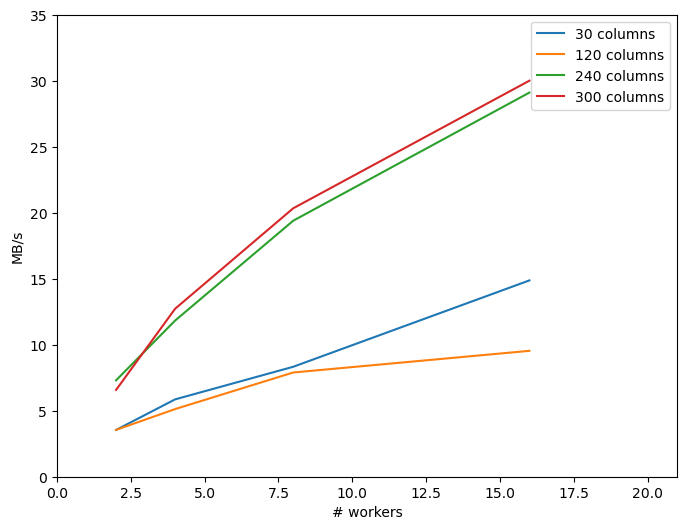

In [14]:
import matplotlib.pyplot as plt

report["MB/s (compressed)"] = report.compressed_bytes/report.process_columns/(1024*1024)

report_by_ncols = report.groupby('n_columns_read')

plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group["MB/s (compressed)"], label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('MB/s')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report['MB/s (compressed)'].max() + 5)
plt.show()

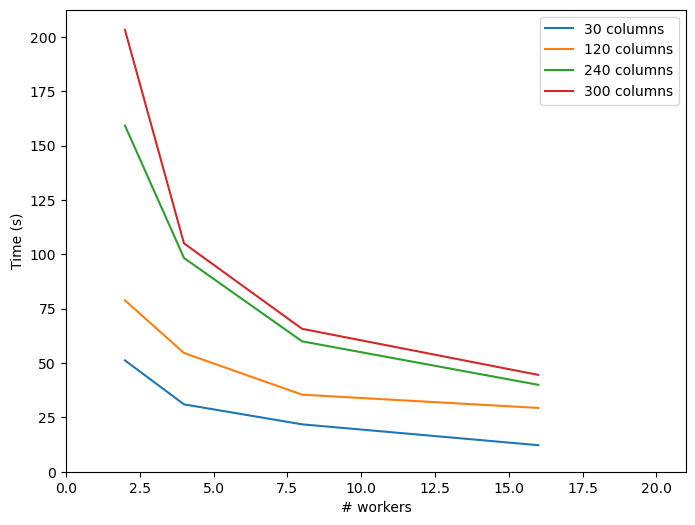

In [15]:
plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group.process_columns, label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('Time (s)')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report.run.max() + 5)
plt.show()

### T2_DE_DESY

In [16]:
import os, sys
sys.path.append(os.getcwd()+"/../af_benchmark")
from benchmark import Benchmark, run_benchmark
import numpy as np
import tqdm
import time
from dask_gateway import Gateway
%env XRD_REQUESTTIMEOUT 300

nworkers_options = [2,4,8,16]
col_num_options = [30,120,240,300]
# nworkers_options = [8]
# col_num_options = [1200]

b = Benchmark("config_3.2.yaml")
file = b.config["data-access"]["files"][0]
file = file.replace("/eos/purdue", "root://dcache-cms-xrootd.desy.de:1094/")
b.config["data-access"]["files"] = [file]
for nworkers in nworkers_options:
    for col_num in tqdm.tqdm(col_num_options):
        b.config["executor"]["n_workers"] = int(nworkers)
        b.config["processor"]["columns"] = int(col_num)
        b.reset(keep_cluster=True, reset_workers=True)
        b.run()
        b.update_report()

report = b.report_df

env: XRD_REQUESTTIMEOUT=300


/depot/cms/kernels/python3/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46593 instead
  warnings.warn(
2024-03-08 11:25:44,762 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 11:25:44,762 - distributed.utils - INFO - Reload module tmp6wgxzklu from .py file
2024-03-08 11:25:44,763 - distributed.preloading - INFO - Import preload module: /tmp/tmp6wgxzklu.py
2024-03-08 11:25:44,770 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 11:25:44,770 - distributed.utils - INFO - Reload module tmpfnejz1jb from .py file
2024-03-08 11:25:44,771 - distributed.preloading - INFO - Import preload module: /tmp/tmpfnejz1jb.py
2024-03-08 11:25:44,772 - distributed.preloading - INFO - Creating preload: import

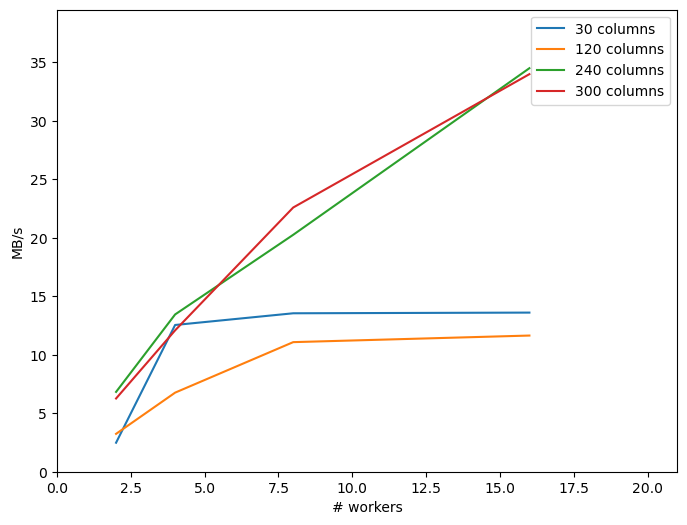

In [17]:
import matplotlib.pyplot as plt

report["MB/s (compressed)"] = report.compressed_bytes/report.process_columns/(1024*1024)

report_by_ncols = report.groupby('n_columns_read')

plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group["MB/s (compressed)"], label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('MB/s')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report['MB/s (compressed)'].max() + 5)
plt.show()

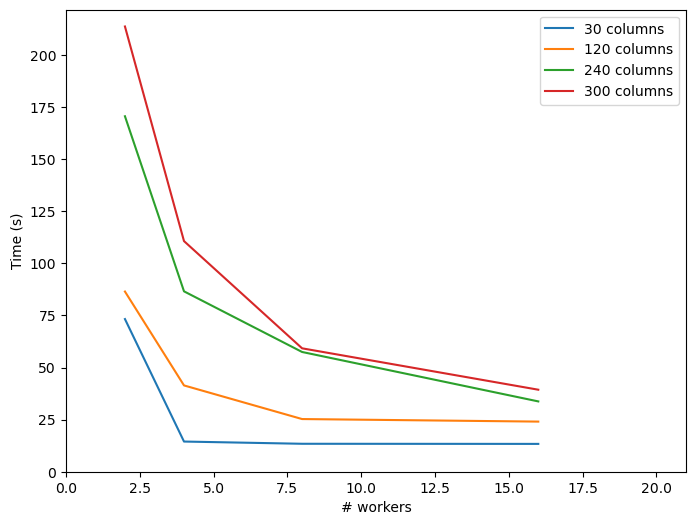

In [18]:
plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group.process_columns, label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('Time (s)')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report.run.max() + 5)
plt.show()

### T3_KR_KISTI

In [19]:
import os, sys
sys.path.append(os.getcwd()+"/../af_benchmark")
from benchmark import Benchmark, run_benchmark
import numpy as np
import tqdm
import time
from dask_gateway import Gateway
%env XRD_REQUESTTIMEOUT 300

nworkers_options = [2,4,8,16]
col_num_options = [30,120,240,300]
# nworkers_options = [8]
# col_num_options = [1200]

b = Benchmark("config_3.2.yaml")
file = b.config["data-access"]["files"][0]
file = file.replace("/eos/purdue", "root://cms-xrdr.sdfarm.kr:1094/")
b.config["data-access"]["files"] = [file]
for nworkers in nworkers_options:
    for col_num in tqdm.tqdm(col_num_options):
        b.config["executor"]["n_workers"] = int(nworkers)
        b.config["processor"]["columns"] = int(col_num)
        b.reset(keep_cluster=True, reset_workers=True)
        b.run()
        b.update_report()

report = b.report_df

env: XRD_REQUESTTIMEOUT=300


2024-03-08 11:44:23,066 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 11:44:23,066 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 11:44:23,066 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 11:44:23,067 - distributed.utils - INFO - Reload module tmp7_3_u8uq from .py file
2024-03-08 11:44:23,067 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-03-08 11:44:23,067 - distributed.utils - INFO - Reload module tmplnborigy from .py file
2024-03-08 11:44:23,067 - distributed.utils - INFO - Reload module tmpndqb1bry from .py file
2024-03-08 11:44:23,067 - distributed.preloading - INFO - Import preload module: /tmp/tmp7_3_u8uq.py
2024-03-08 11:44:23,

FileNotFoundError: file not found ([ERROR] Server responded with an error: [3010] Opening path '/store/data/Run2017C/SingleMuon/NANOAOD/02Apr2020-v1/30000/1458BAF1-0467-344C-99A8-8B216A403FB8.root' is disallowed.)

    'root://cms-xrdr.sdfarm.kr:1094//store/data/Run2017C/SingleMuon/NANOAOD/02Apr2020-v1/30000/1458BAF1-0467-344C-99A8-8B216A403FB8.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


In [ ]:
import matplotlib.pyplot as plt

report["MB/s (compressed)"] = report.compressed_bytes/report.process_columns/(1024*1024)

report_by_ncols = report.groupby('n_columns_read')

plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group["MB/s (compressed)"], label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('MB/s')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report['MB/s (compressed)'].max() + 5)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group.process_columns, label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('Time (s)')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report.run.max() + 5)
plt.show()